In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [3]:
zaraSales = pd.read_csv("C:/Users/garci/Desktop/Data analytics/Analisis/Zara sales/Zara_Sales_Analysis.csv",sep=";")

In [4]:
zaraSales

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,159182,Front of Store,Yes,Clothing,No,1014,Zara,https://www.zara.com/us/en/basic-100-wool-swea...,321993245-500-2,FAUX LEATHER OVERSIZED JACKET LIMITED EDITION,Jacket made of technical fabric with padded in...,169.00,USD,2024-02-19T09:10:43.883037,jackets,MAN
248,199233,Aisle,Yes,Clothing,No,2222,Zara,https://www.zara.com/us/en/colorblock-knit-cro...,330590505-500-2,CONTRASTING PATCHES BOMBER JACKET,Oversized jacket. Notched lapel collar and lon...,159.00,USD,2024-02-19T09:10:44.463883,jackets,MAN
249,137044,Aisle,No,Clothing,Yes,2534,Zara,https://www.zara.com/us/en/hooded-technical-ja...,320680326-107-39,PATCH BOMBER JACKET,Varsity jacket with elastic collar and long sl...,12.99,USD,2024-02-19T09:10:45.009106,jackets,MAN
250,154736,Front of Store,Yes,Clothing,Yes,1466,Zara,https://www.zara.com/us/en/houndstooth-suit-ja...,311292244-800-39,CROPPED BOMBER JACKET LIMITED EDITION,Varsity jacket with padded interior. Rib elast...,19.90,USD,2024-02-19T09:10:45.631804,jackets,MAN


In [5]:
zaraSales.isnull().sum()

Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
sku                 0
name                1
description         2
price               0
currency            0
scraped_at          0
terms               0
section             0
dtype: int64

Recuperamos las columnas que tengan algun null

In [6]:
nulls = zaraSales.isnull().any(axis=1)

Como solamente tenemos dos registros con nulls no es significativo para el analisis

In [7]:
zaraSales[nulls]

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
60,151925,End-cap,Yes,Clothing,Yes,2179,Zara,https://www.zara.com/us/en/vintage-effect-leat...,320774184-800-97,VINTAGE EFFECT LEATHER BOMBER JACKET,NaN,299.0,USD,2024-02-19T08:50:43.543555,jackets,MAN
72,173576,End-cap,Yes,Clothing,No,1838,Zara,https://www.zara.com/us/en/-p04310461.html,336378923-700-2,NaN,NaN,129.0,USD,2024-02-19T08:50:54.476057,jackets,MAN


In [8]:
zaraSales['Product Category'].value_counts(dropna=True)

Product Category
Clothing    252
Name: count, dtype: int64

In [9]:
zaraSales['Product Position'].value_counts(dropna=True)

Product Position
Aisle             97
End-cap           86
Front of Store    69
Name: count, dtype: int64

In [10]:
zaraSales['section'].value_counts(dropna=True)

section
MAN      218
WOMAN     34
Name: count, dtype: int64

Convertimos a euros el precio para un análisis más comprensible

In [11]:
zaraSales['EU price'] = ((zaraSales['price']) * 0.86210944).round(2)

In [12]:
zaraSales[['EU price','Sales Volume']].describe()

,EU price,Sales Volume
count,252.000000,252.000000
mean,74.358333,1823.702381
std,44.901724,697.703748
min,6.890000,529.000000
25%,43.020000,1243.000000
50%,68.880000,1839.500000
75%,93.970000,2398.750000
max,378.470000,2989.000000


Text(0.5, 0.98, 'Distribución y Dispersión de precio - Zara')

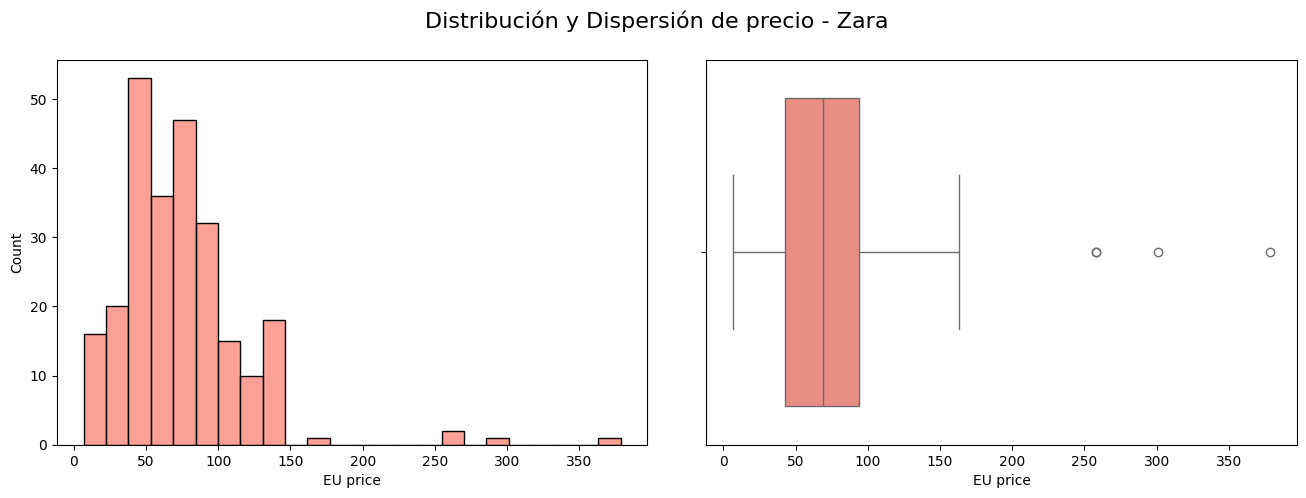

In [21]:
#distribucion del precio
fig, axs = plt.subplots(1,2, figsize=(16,5), gridspec_kw={'wspace': 0.1})
sns.histplot(
    data = zaraSales,
    x = "EU price",
    color = "Salmon",
    ax = axs[0]
)
sns.boxplot(
    data = zaraSales,
    x = "EU price",
    color = "Salmon",
    ax = axs[1]
)
fig.suptitle("Distribución y Dispersión de precio - Zara", fontsize=16)

Identificamos posibles outliers en el precio

In [15]:
q1_price = zaraSales['EU price'].quantile(0.25)
q3_price = zaraSales['EU price'].quantile(0.75)
iqr = q3_price - q1_price
ext_inferior = q1_price - 1.5*iqr
ext_superior = q3_price + 1.5*iqr
#Filas que contienen outliers usando el IQR
mask_outlier_price = (zaraSales['EU price'] < ext_inferior) | (zaraSales['EU price'] > ext_superior)
outliers = zaraSales.loc[mask_outlier_price]

In [16]:
outliers.shape

(4, 17)

In [17]:
outliers.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section,EU price
13,151396,Front of Store,Yes,Clothing,Yes,729,Zara,https://www.zara.com/us/en/cropped-leather-jac...,323134418-800-3,CROPPED LEATHER JACKET,Leather jacket. Cropped length. Lapel collar a...,439.0,USD,2024-02-19T08:50:13.771115,jackets,MAN,378.47
22,161909,Aisle,Yes,Clothing,No,1290,Zara,https://www.zara.com/us/en/leather-jacket-p054...,315529534-705-3,LEATHER JACKET,Relaxed fit jacket in leather. Spread collar a...,299.0,USD,2024-02-19T08:50:18.813979,jackets,MAN,257.77
38,114877,Aisle,No,Clothing,No,1860,Zara,https://www.zara.com/us/en/suede-jacket-p02521...,323134415-700-3,SUEDE JACKET,Jacket made of suede. Cropped length. Lapel co...,349.0,USD,2024-02-19T08:50:29.497634,jackets,MAN,300.88
60,151925,End-cap,Yes,Clothing,Yes,2179,Zara,https://www.zara.com/us/en/vintage-effect-leat...,320774184-800-97,VINTAGE EFFECT LEATHER BOMBER JACKET,NaN,299.0,USD,2024-02-19T08:50:43.543555,jackets,MAN,257.77


Text(0.5, 0.98, 'Distribución y Dispersión de Ventas - Zara')

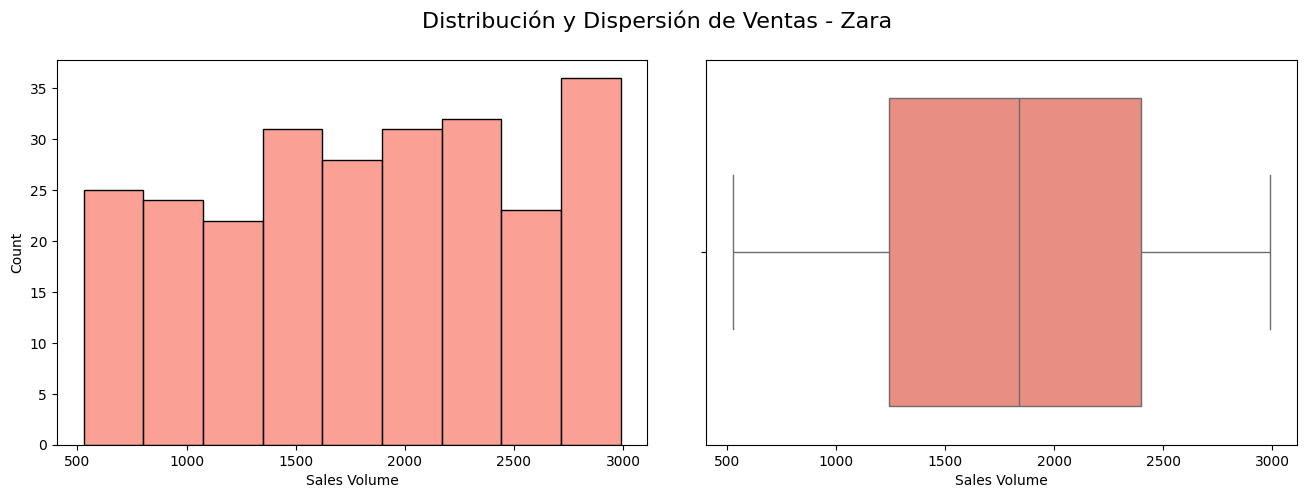

In [20]:
fig, axs = plt.subplots(1,2, figsize=(16,5), gridspec_kw={'wspace': 0.1})
sns.histplot(
    data = zaraSales,
    x = "Sales Volume",
    color = "Salmon",
    ax = axs[0]
)
sns.boxplot(
    data = zaraSales,
    x = "Sales Volume",
    color = "Salmon",
    ax = axs[1]
)
fig.suptitle("Distribución y Dispersión de Ventas - Zara", fontsize=16)